In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load data from the csv file
data = pd.read_csv("./data.csv")
# Convert to np array
data = np.array(data)
data.shape

(42000, 785)

In [3]:
# The dataset has 42k observations of 28 x 28 pixels. 
# Each image has been flattered so that 28 * 28 = 784

# Split the data in a matrix X and a vector y where:
#
# X is dimension (42000, 784)
# y is dimension (42000, )
# y is the first column of the data, while X is the rest
y = data[:, 0]
X = data[:, 1:].T

print(X.shape, y.shape)

(784, 42000) (42000,)


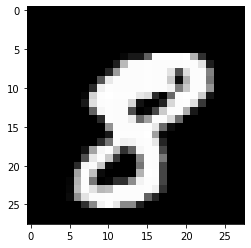

8


In [4]:
# How to visualize image in Python
import matplotlib.pyplot as plt

def show_data_image(X, indx=0):
    # Load an image in memory
    img = X[:, indx]
    img = np.reshape(img, (28, 28))

    # Show the image
    plt.imshow(img, cmap="gray")
    plt.show()

show_data_image(X, 10)
print(y[10])

In [5]:
# Create a function that takes as input a dataset X
# and an integer Ntrain and returns two arrays
# Xtrain and Xtest where:
# Xtrain is composed by N_train random samples from X
# Xtest is the rest of the dataset
# Limitation: the sample must be random

def train_test_split(X, y, Ntrain):
    data = np.append(np.array([y]).T, X.T, axis=1)
    np.random.shuffle(data)
    X_train = data[:Ntrain, 1:].T
    X_test = data[Ntrain:, 1:].T
    y_train = data[:Ntrain, 0]
    y_test = data[Ntrain:, 0]
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y, int(X.shape[1] * 0.8))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 33600)
(784, 8400)
(33600,)
(8400,)


In [11]:
def PCA(X, k):
    # Center the matrix
    cx = np.array([np.mean(col) for col in X])
    # print(f"centroid {cx}")

    X_c = (X.T - cx).T
    # print(f"X_c = {X_c}")
    
    U, _, _ = np.linalg.svd(X_c) # U_k in R^(d*k)
    print(U.shape)
    U_k = U[:,:k]
    # print(f"U_k.shape = {U_k.shape}")
    return U_k.T @ X_c

In [13]:
Z = PCA(X_train, 2)

KeyboardInterrupt: 

In [ ]:
Z.shape

(2, 33600)